<a href="https://colab.research.google.com/github/m-mejiap/TopicosAvanzadosEnAnalitica/blob/main/Ejercicios%20Grafos/E11-PatentCitationNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patent Citation Network

U.S. patent dataset is maintained by the [National Bureau of Economic Research](http://www.nber.org/). The data set spans 37 years (January 1, 1963 to December 30, 1999), and includes all the utility patents granted during that period, totaling 3,923,922 patents. The citation graph includes all citations made by patents granted between 1975 and 1999, totaling 16,522,438 citations. For the patents dataset there are 1,803,511 nodes for which we have no information about their citations (we only have the in-links).

The data was originally released by [NBER](http://www.nber.org/patents/). The dataset can be found at this link: [Stanford Patent Citation Network](https://snap.stanford.edu/data/cit-Patents.html)

#Task: Build Recommendation System

Build a recommendation system based on Node2Vec with the patent information, remember to do a descriptive analysis and apply visualizations.

Also, remember that when making a recommendation about which patent should be associated with another, make a visualization of the recommendation.

# Solución:

## Import Packages

In [1]:
!pip install node2vec

In [2]:
import random
import numpy as np
import pandas as pd
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

## Import data

In [3]:
try:
  patent = pd.read_csv("cit-Patents.txt.gz",
                       compression = "gzip",
                       sep = "\t",
                       names = ["start_node", "end_node"],
                       skiprows = 5
                       )
except:
  patent = pd.read_csv("http://snap.stanford.edu/data/cit-Patents.txt.gz",
                       compression = "gzip",
                       sep = "\t",
                       names = ["start_node", "end_node"],
                       skiprows = 5
                       )

In [4]:
#Revisemos el dataset importado.
patent

,start_node,end_node
0,3858241,1324234
1,3858241,3398406
2,3858241,3557384
3,3858241,3634889
4,3858242,1515701
...,...,...
16518942,6009554,4617662
16518943,6009554,4740972
16518944,6009554,4831521
16518945,6009554,5048064


## Descriptive analysis and visualizations

In [5]:
#Tenemos un grafo de 16'518.947 edges y 3'774.767 nodos (es gigante).
len(np.unique(patent[['start_node', 'end_node']].values))

3774767

In [6]:
%%time
#Construir el grafo.
G = nx.from_pandas_edgelist(patent, "start_node", "end_node")

CPU times: user 56.8 s, sys: 1.73 s, total: 58.5 s
Wall time: 1min 2s


In [7]:
#Analicemos las características de nuestro nodo.
print('Número de nodos:', G.number_of_nodes())
print('Número de egdes:', G.number_of_edges())

Número de nodos: 3774767
Número de egdes: 16518947


Max degree: 793
Min degree: 1
Mean degree: 8.75
Median degree: 6.0


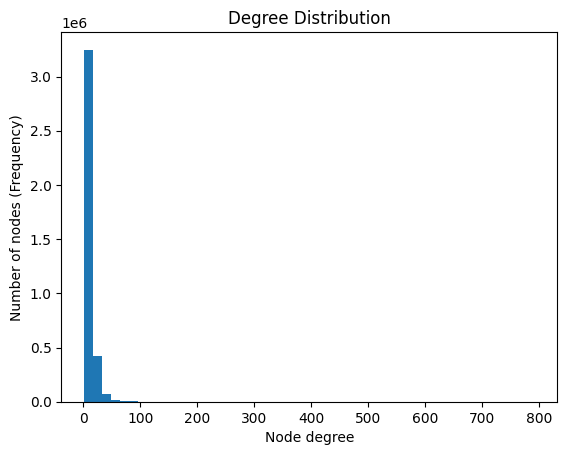

CPU times: user 10.5 s, sys: 585 ms, total: 11.1 s
Wall time: 12.1 s


In [8]:
%%time
#Grafiquemos cuántos nodos hay por cada grado.
degrees = dict(G.degree())
degree_values = list(degrees.values())

print('Max degree:', max(degree_values))
print('Min degree:', min(degree_values))
print('Mean degree:', round(np.mean(degree_values), 2))
print('Median degree:', round(np.median(degree_values), 2))

plt.hist(degree_values, bins = 50)
plt.xlabel('Node degree')
plt.ylabel('Number of nodes (Frequency)')
plt.title('Degree Distribution')
plt.show()

In [9]:
%%time
#No logramos graficar ni analizar el grafo completo dado que los tiempo de ejecución eran muy altos.
#Dado el extenso tamaño del grafo, decidimos tomar solo una muestra de éste para ejecutar el análisis requerido.
filtered_G = nx.from_pandas_edgelist(patent[:1007], "start_node", "end_node")

CPU times: user 2.82 ms, sys: 0 ns, total: 2.82 ms
Wall time: 4.77 ms


In [10]:
#Analicemos las características de nuestro nuevo grafo.
print('Número de nodos:', filtered_G.number_of_nodes())
print('Número de egdes:', filtered_G.number_of_edges())

Número de nodos: 1204
Número de egdes: 1007


Max degree: 15
Min degree: 1
Mean degree: 1.67
Median degree: 1.0


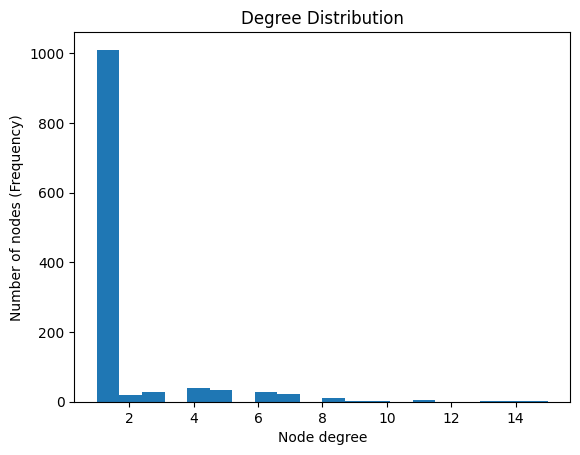

CPU times: user 339 ms, sys: 26.9 ms, total: 366 ms
Wall time: 849 ms


In [11]:
%%time
#Grafiquemos cuántos nodos hay por cada grado.
degrees = dict(filtered_G.degree())
degree_values = list(degrees.values())

print('Max degree:', max(degree_values))
print('Min degree:', min(degree_values))
print('Mean degree:', round(np.mean(degree_values), 2))
print('Median degree:', round(np.median(degree_values), 2))

plt.hist(degree_values, bins = 20)
plt.xlabel('Node degree')
plt.ylabel('Number of nodes (Frequency)')
plt.title('Degree Distribution')
plt.show()

CPU times: user 2.23 s, sys: 14.1 ms, total: 2.25 s
Wall time: 2.26 s


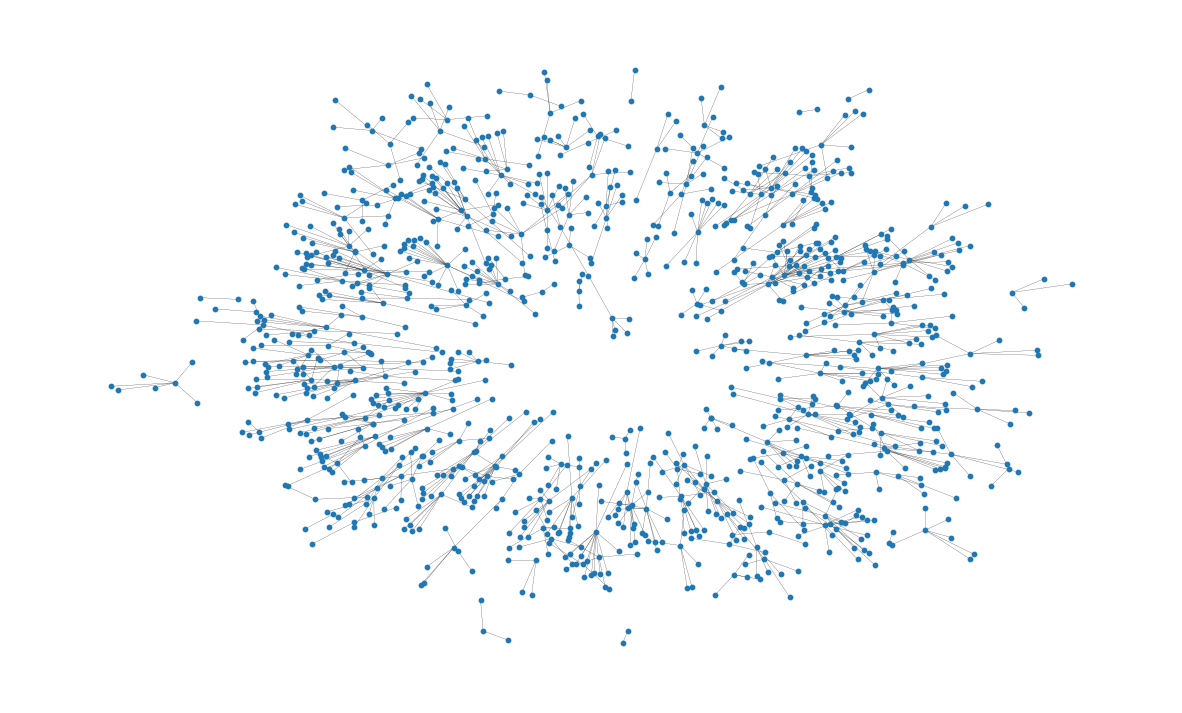

In [12]:
%%time
#Ahora, vamos a graficar/visualizar nuestro grafo.
plt.figure(figsize = (15, 9))
plt.axis("off")
nx.draw_networkx(filtered_G,
                 pos = nx.spring_layout(filtered_G, iterations = 15, seed = 25),
                 node_size = 10,
                 with_labels = False,
                 width = 0.15
                 )

## Build recommendation system

In [13]:
%%time
#Construir el modelo Node2Vec.
node2vec = Node2Vec(filtered_G, dimensions = 64, walk_length = 20, num_walks = 200, p = 2, q = 1, workers = 1)
model = node2vec.fit(window = 10, min_count = 1, batch_words = 4)

Computing transition probabilities:   0%|          | 0/1204 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [00:15<00:00, 12.84it/s]


CPU times: user 3min 47s, sys: 37.3 s, total: 4min 24s
Wall time: 3min 47s


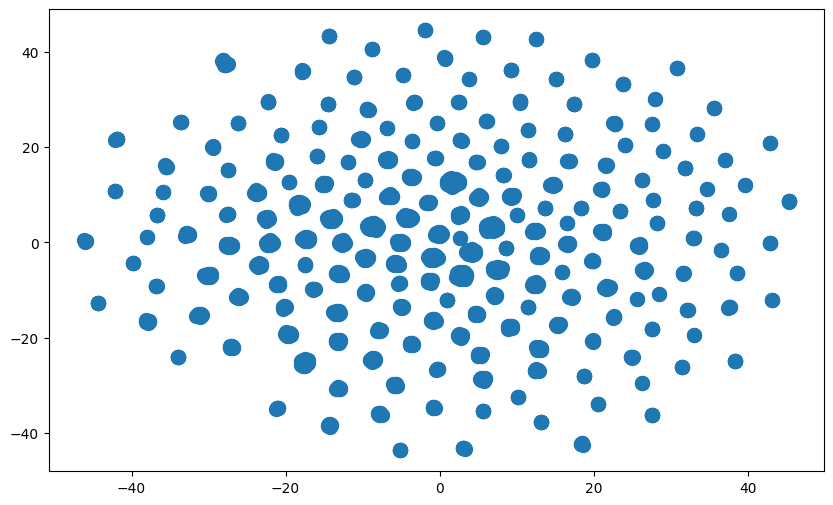

CPU times: user 13.2 s, sys: 214 ms, total: 13.4 s
Wall time: 7.72 s


In [14]:
%%time
#Entrenar TSNE.
tsne = TSNE(n_components = 2, learning_rate = 'auto', init = 'pca', random_state = 0).fit_transform(np.array([model.wv.get_vector(str(i)) for i in model.wv.index_to_key]))

#Graficar resultado de TSNE.
plt.figure(figsize=(10, 6))
plt.scatter(tsne[:, 0], tsne[:, 1], s=100)
plt.show()

In [15]:
#Opción 1: primer acercamiento al sistema de recomendación.
def recommend1(patent):
  print(f"Top recommended patents for patent {patent}:")
  recommendation = []
  for id in model.wv.most_similar(patent)[:5]:
    if id[1] >= 0.8:
      print(f'{id[0]}: {id[1]:.2f}')
      recommendation.append(int(id[0]))

  #Vamos a visualizar la recomendación.
  color_map = []
  for node in filtered_G:
    if node in recommendation:
        color_map.append('red')
    elif node == int(patent):
      color_map.append('orange')
    else:
        color_map.append('black')

  plt.figure(figsize = (15, 9))
  plt.axis("off")
  nx.draw_networkx(filtered_G,
                   pos = nx.spring_layout(filtered_G, iterations = 15, seed = 25),
                   node_size = 10,
                   with_labels = False,
                   width = 0.15,
                   node_color = color_map
                   )

In [16]:
#Opción 2: segundo acercamiento al sistema de recomendación.
similarity_matrix = cosine_similarity(model.wv.vectors)
def recommend2(patent):
  nodes = list(filtered_G.nodes)
  similarity_scores = similarity_matrix[nodes.index(patent)]
  similar_patents = sorted(enumerate(similarity_scores), key=lambda x: x[1], reverse=True)
  recommended_patents = [(nodes[patent_id], score) for patent_id, score in similar_patents if score > 0.9]
  recommended_patents.pop(0)
  print(f"Top recommended patents for patent {patent}:")
  for r in recommended_patents:
    print(f'{r[0]}: {r[1]:.2f}')

  recommendation = [nodes[patent_id] for patent_id, score in similar_patents if score >= 0.9]
  recommendation.pop(0)

  #Vamos a visualizar la recomendación.
  color_map = []
  for node in filtered_G:
    if node in recommendation:
        color_map.append('red')
    elif node == int(patent):
      color_map.append('orange')
    else:
        color_map.append('black')

  plt.figure(figsize = (15, 9))
  plt.axis("off")
  nx.draw_networkx(filtered_G,
                   pos = nx.spring_layout(filtered_G, iterations = 15, seed = 25),
                   node_size = 10,
                   with_labels = False,
                   width = 0.15,
                   node_color = color_map
                   )

Top recommended patents for patent 3858241:
3398406: 0.99
1324234: 0.99
3634889: 0.98
3557384: 0.98


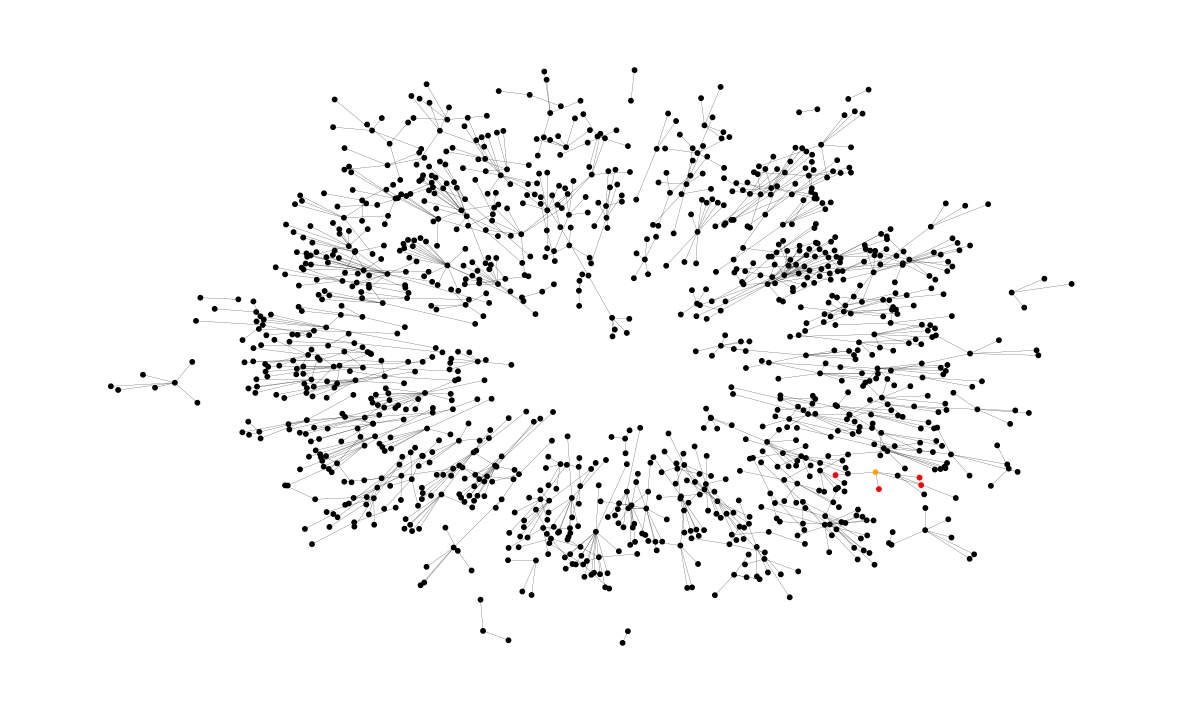

In [17]:
ask_recom = 3858241
#Probar la opción 1.
recommend1(str(ask_recom))

Top recommended patents for patent 3858241:
3590624: 0.99
3858438: 0.98
3584500: 0.98
3024644: 0.98
2741363: 0.98
3662593: 0.98
2484217: 0.98
3473382: 0.98
3858430: 0.98
3628226: 0.98
3781523: 0.98
3552930: 0.98
3315202: 0.98
3719862: 0.97
3168034: 0.97


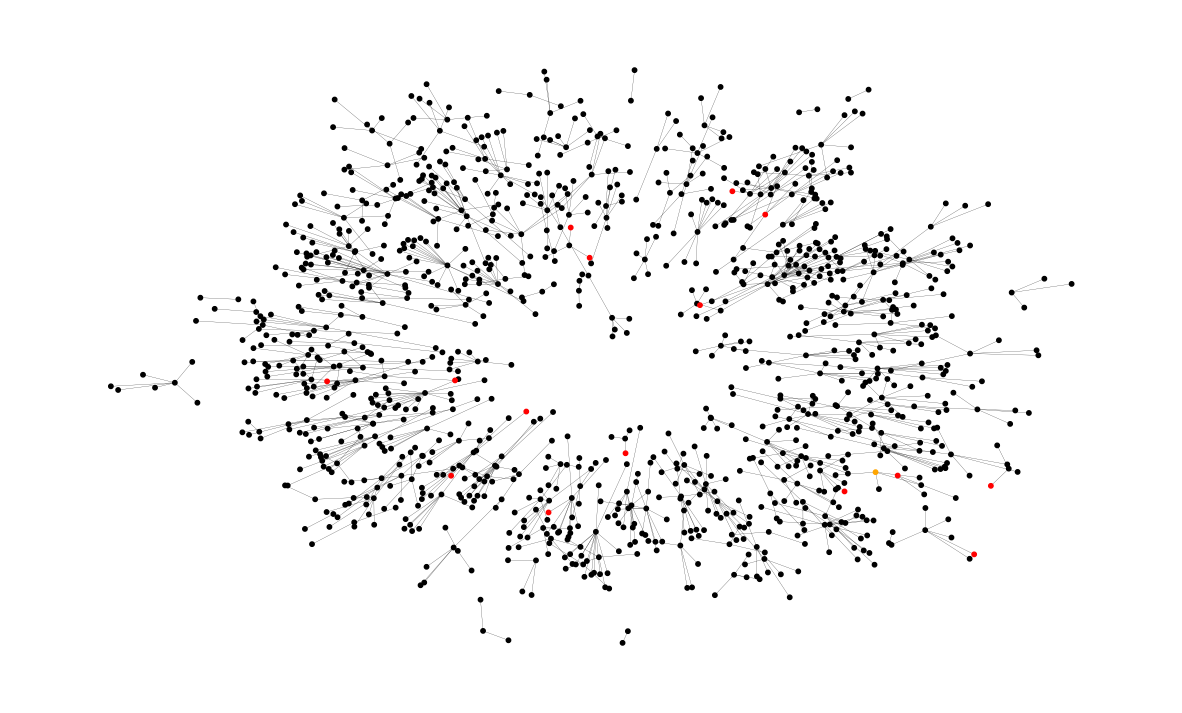

In [18]:
#Probar la opción 2.
recommend2(ask_recom)

Top recommended patents for patent 3858242:
1515701: 0.99
3707004: 0.98
3668705: 0.98
3319261: 0.98


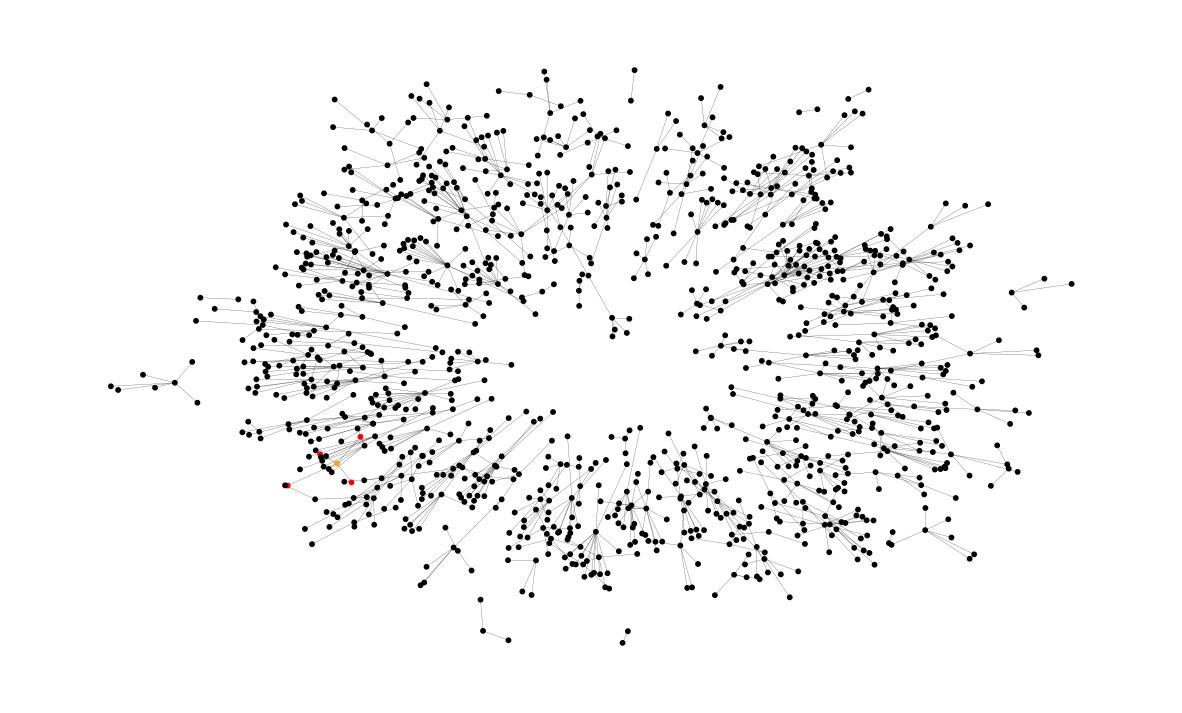

In [19]:
ask_recom = 3858242
#Probar la opción 1.
recommend1(str(ask_recom))

Top recommended patents for patent 3858242:
3858427: 0.98
3731519: 0.98
3668900: 0.98
2887224: 0.98
3140600: 0.98
3858421: 0.98
3030879: 0.98
747749: 0.98
2239192: 0.98
2132148: 0.98
3858428: 0.98


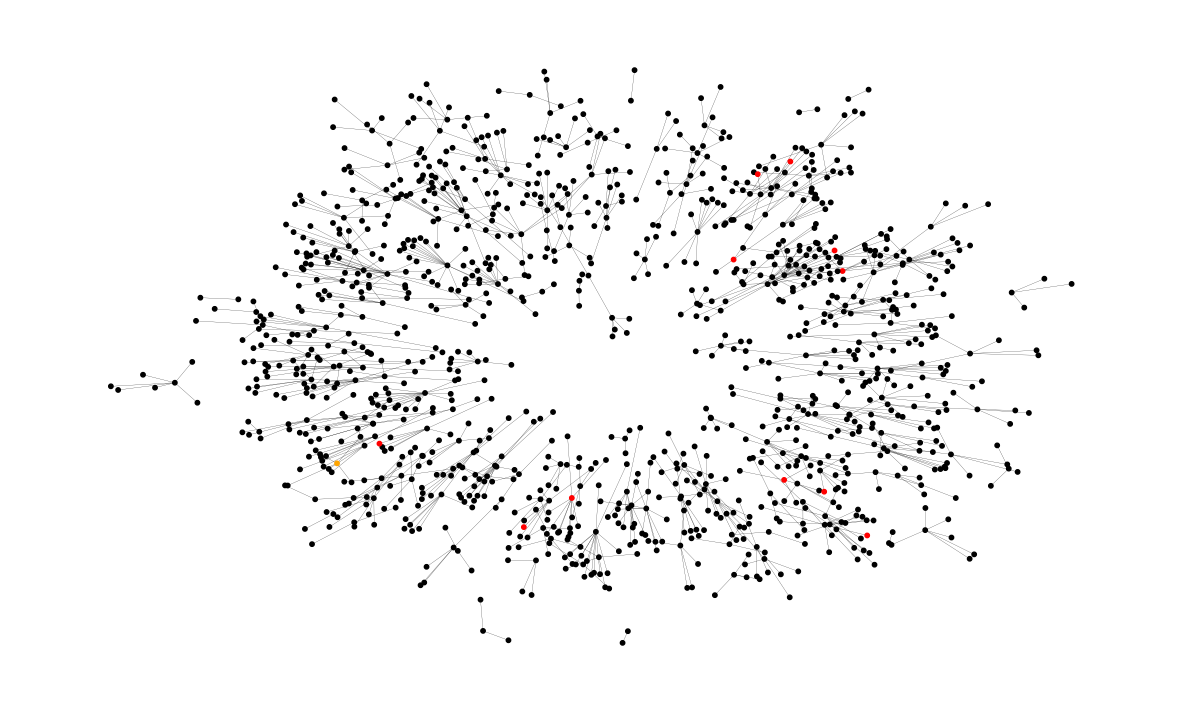

In [20]:
#Probar la opción 2.
recommend2(ask_recom)

Top recommended patents for patent 3858292:
3703954: 1.00


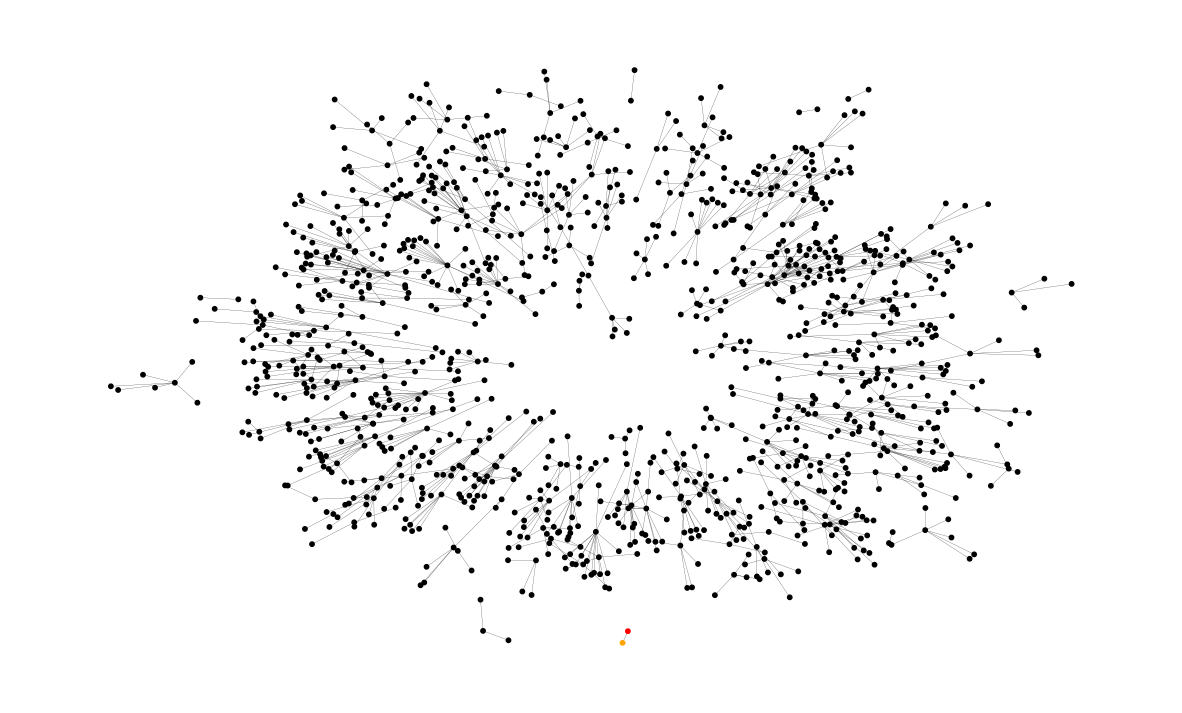

In [21]:
ask_recom = 3858292
#Probar la opción 1.
recommend1(str(ask_recom))

Top recommended patents for patent 786586:
3858419: 1.00
1662612: 1.00


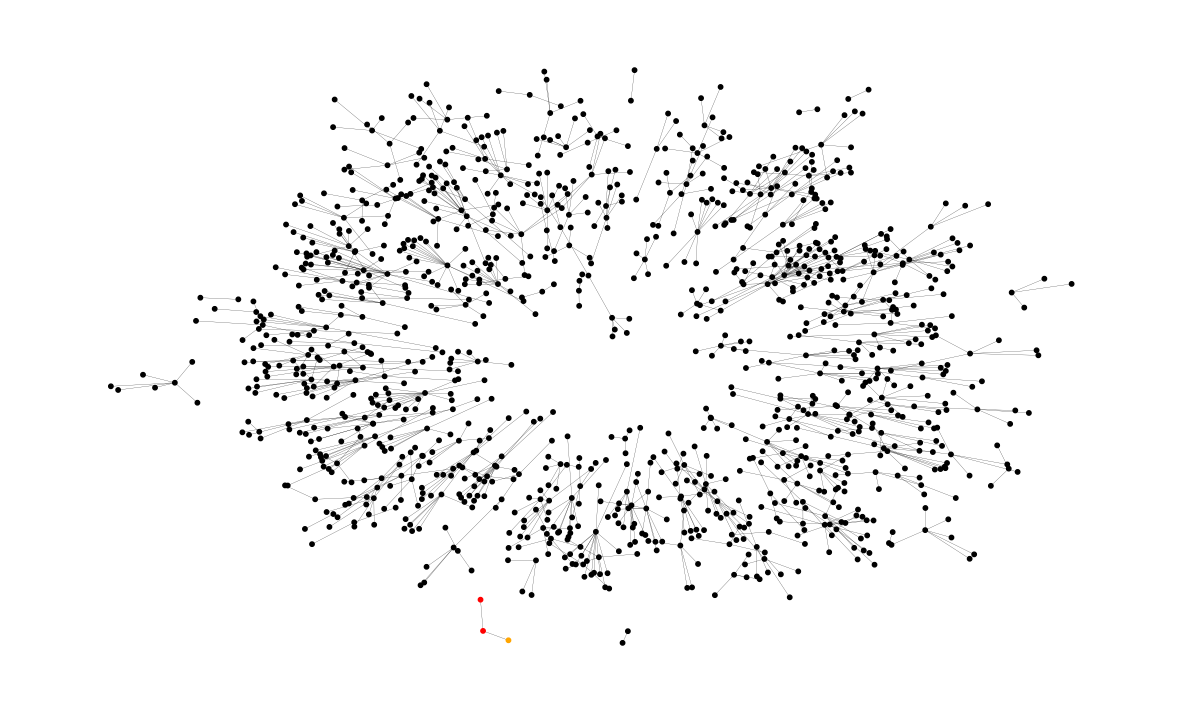

In [22]:
ask_recom = 786586
#Probar la opción 1.
recommend1(str(ask_recom))

Top recommended patents for patent 3640059:
3455095: 1.00
3540200: 1.00
3540201: 1.00
3077311: 1.00
3478504: 1.00


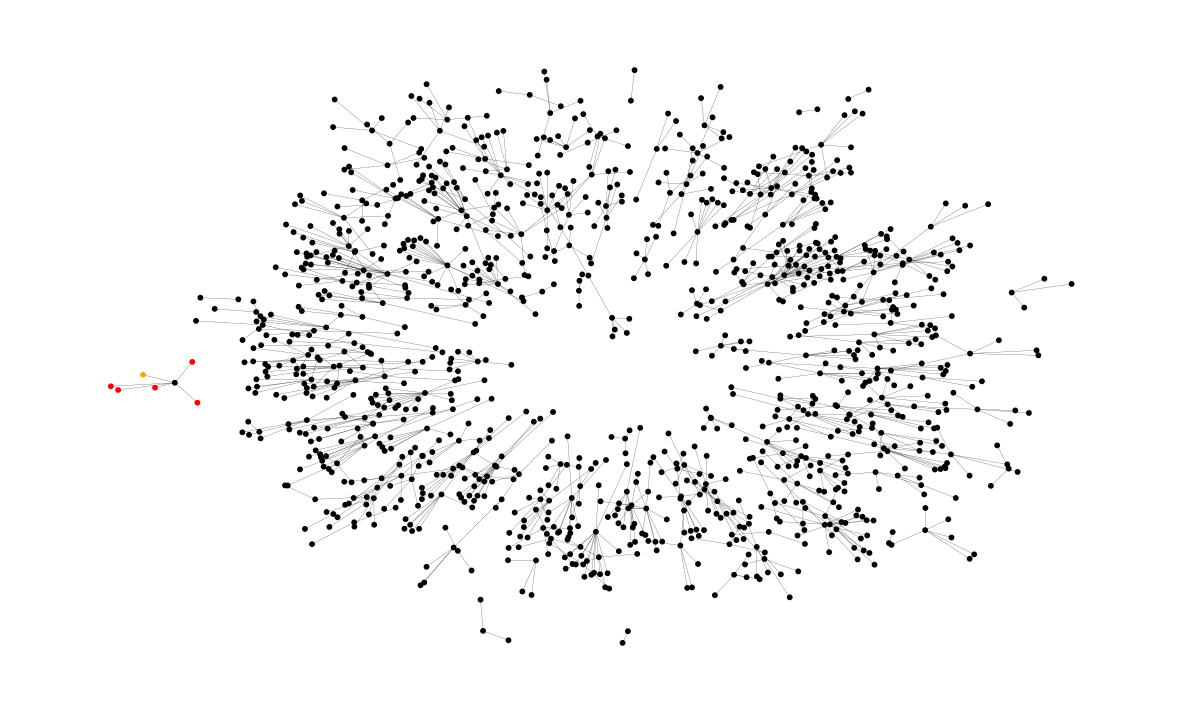

In [23]:
ask_recom = 3640059
#Probar la opción 1.
recommend1(str(ask_recom))